In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

(1080, 1920)


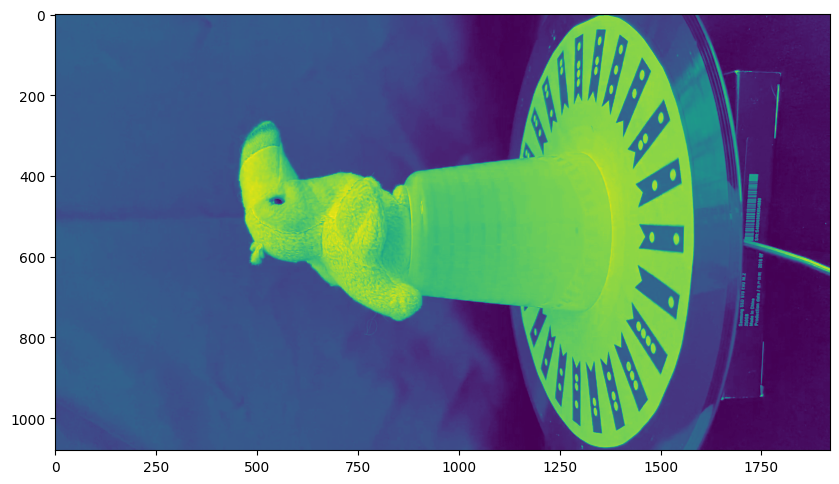

In [39]:
image = cv.imread("./assignment1_test_dataset/obj01/000000.png").astype(np.uint8)
img = image[:,:,-1]

print(img.shape)
plt.figure( figsize=(10,10) )
plt.imshow(img,)

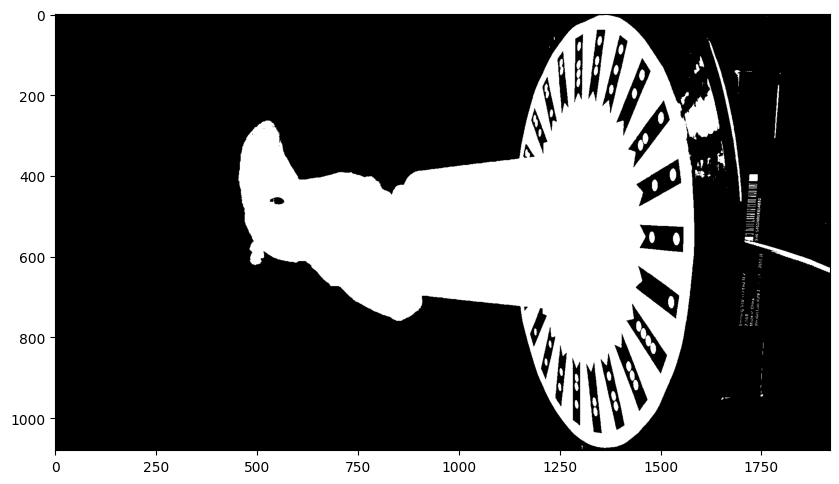

In [40]:
_, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.figure( figsize=(10,10) )
plt.imshow(thresh, cmap="gray")

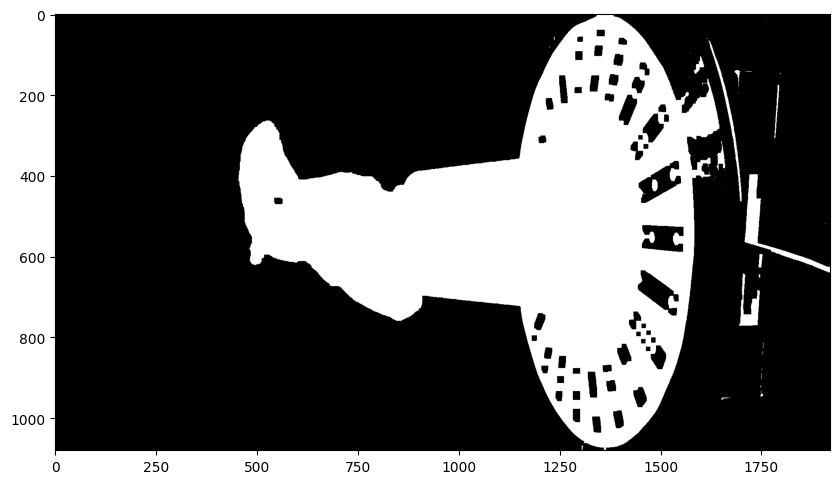

In [41]:
# Our kernel
#kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
kernel = np.ones((3,3),np.uint8)
closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=5)

plt.figure( figsize=(10,10))
plt.imshow( closing, cmap="gray")

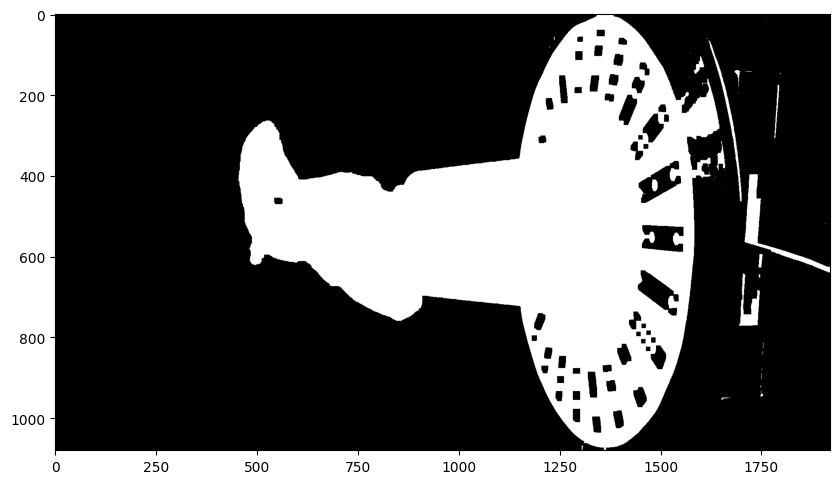

In [42]:
dilation = cv.dilate(closing, kernel, iterations = 20)

plt.figure( figsize=(10,10))
plt.imshow( closing, cmap="gray")

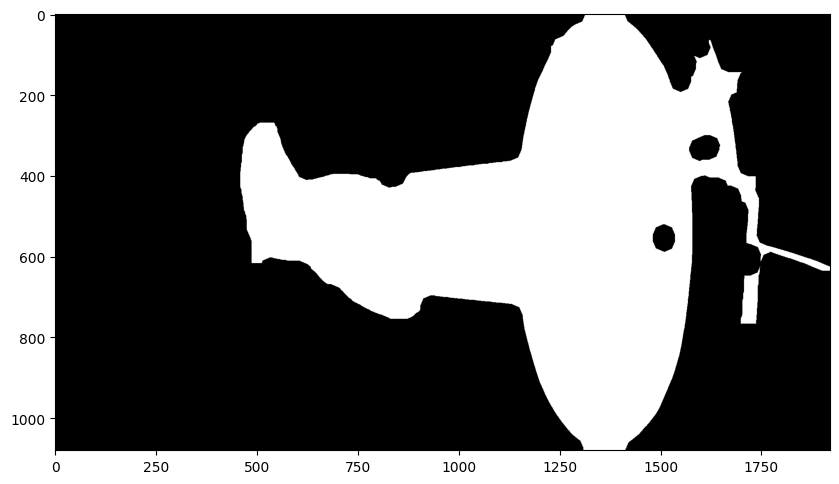

In [43]:
dist_transform = cv.distanceTransform(dilation, cv.DIST_L2, 3)
ret, sure_fg = cv.threshold(dist_transform, 0.1*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

plt.figure( figsize=(10,10))
plt.imshow( sure_fg, cmap="gray")

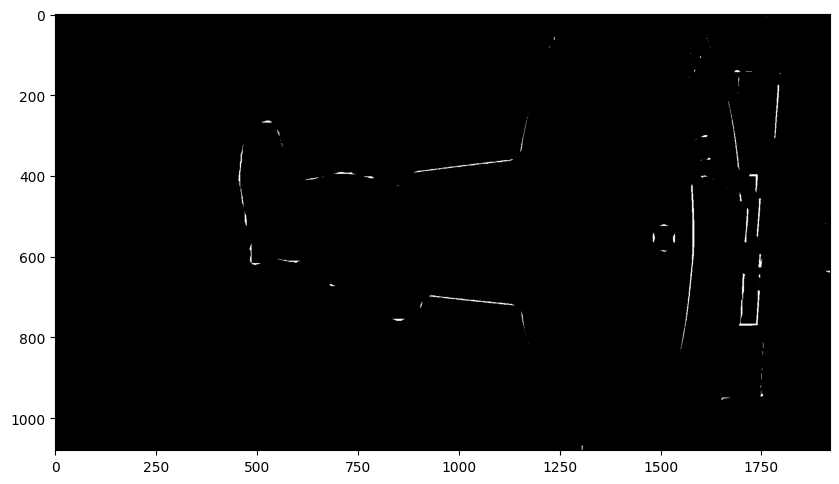

In [44]:

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(closing, sure_fg)

plt.figure( figsize=(10,10))
plt.imshow( unknown, cmap="gray")

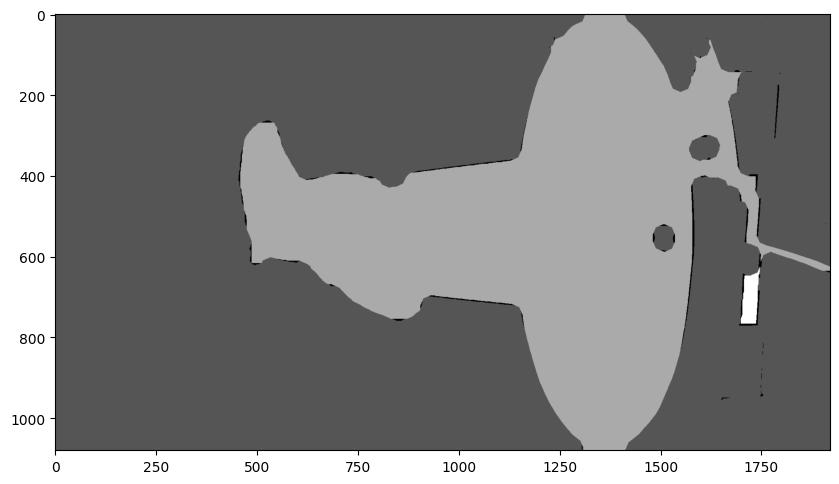

In [45]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0


plt.figure( figsize=(10,10))
plt.imshow( markers, cmap="gray")

In [46]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [50]:
np.unique(markers)

array([-1,  1,  2,  3], dtype=int32)

In [61]:
markers = cv.watershed(image, markers)
image[markers == -1] = [0, 0, 255]  # Mark boundary regions in red
image[markers == 1] = [0, 0, 0]  # Background regions in black
image[(markers !=1 & markers != -1).all()] = [255, 255, 255]  # Foreground regions in white


plt.figure( figsize=(10,10))
plt.imshow( cv.cvtColor(image, cv.COLOR_BGR2GRAY), cmap="gray")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# Video Procedure

In [48]:
'''# Wanted video to process
object = 'obj01'

# Read the input video
input_video = cv.VideoCapture(f'./data/{object}.mp4')

# Get video properties
frame_width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))
fps = input_video.get(cv.CAP_PROP_FPS)

# Create output video writer
output_video = cv.VideoWriter(f'./output/{object}_mask.mp4', cv.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))'''

"# Wanted video to process\nobject = 'obj01'\n\n# Read the input video\ninput_video = cv.VideoCapture(f'./data/{object}.mp4')\n\n# Get video properties\nframe_width = int(input_video.get(cv.CAP_PROP_FRAME_WIDTH))\nframe_height = int(input_video.get(cv.CAP_PROP_FRAME_HEIGHT))\nfps = input_video.get(cv.CAP_PROP_FPS)\n\n# Create output video writer\noutput_video = cv.VideoWriter(f'./output/{object}_mask.mp4', cv.VideoWriter_fourcc(*'MP4V'), fps, (frame_width, frame_height))"

In [49]:
'''# Iterate through each frame of the input video
while True:
    ret, frame = input_video.read()

    if not ret: break

    # Apply seed-based watershed algorithm
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)


    _, markers = cv.connectedComponents(thresh)
    markers = markers + 1
    markers[markers == 255] = 0
    markers = cv.watershed(frame, markers)

    # Convert markers to colored overlay
    overlay = np.zeros(frame.shape, dtype=np.uint8)
    overlay[markers == -1] = (0, 0, 255)  # Red color for boundaries

    # Apply the overlay on the frame
    result = cv.addWeighted(frame, 1, overlay, 0.5, 0)

    # Write the transformed frame to the output video
    output_video.write(result)

# Release video objects
input_video.release()
output_video.release()
'''

'# Iterate through each frame of the input video\nwhile True:\n    ret, frame = input_video.read()\n\n    if not ret: break\n\n    # Apply seed-based watershed algorithm\n    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)\n    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)\n\n\n    _, markers = cv.connectedComponents(thresh)\n    markers = markers + 1\n    markers[markers == 255] = 0\n    markers = cv.watershed(frame, markers)\n\n    # Convert markers to colored overlay\n    overlay = np.zeros(frame.shape, dtype=np.uint8)\n    overlay[markers == -1] = (0, 0, 255)  # Red color for boundaries\n\n    # Apply the overlay on the frame\n    result = cv.addWeighted(frame, 1, overlay, 0.5, 0)\n\n    # Write the transformed frame to the output video\n    output_video.write(result)\n\n# Release video objects\ninput_video.release()\noutput_video.release()\n'